In [3]:
import pandas as pd

In [4]:
fruit= pd.read_csv('fruits.csv')
fruit= fruit.set_index('Unnamed: 0')
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height
Unnamed: 0,,,,,,
0,1,apple,granny_smith,192,8.4,7.3
1,1,apple,granny_smith,180,8.0,6.8
2,1,apple,granny_smith,176,7.4,7.2
3,2,mandarin,mandarin,86,6.2,4.7
4,2,mandarin,mandarin,84,6.0,4.6


In [5]:
#Knn fruits
#Charger le jeu de données fruits.csv
#Examiner les données
#Entrainer un modèle KNN et essayer d’améliorer ses performances en recherchant le meilleur réglage
#Prédire la classe correspondante aux fruits suivants : 

#mass 100g, width 6.3 cm, height 8.5 cm
#mass 20g, width 4.3 cm, height 5.5 cm
#Tester une régression logistique et comparer les résultats

In [44]:
fruit2=fruit
fruit2= fruit2.drop(columns=('fruit_subtype'))
fruit2= fruit2.drop(columns=('fruit_name'))
fruit2.head(10)

,fruit_label,mass,width,height
Unnamed: 0,,,,
0,1,192,8.4,7.3
1,1,180,8.0,6.8
2,1,176,7.4,7.2
3,2,86,6.2,4.7
4,2,84,6.0,4.6
5,2,80,5.8,4.3
6,2,80,5.9,4.3
7,2,76,5.8,4.0
8,1,178,7.1,7.8


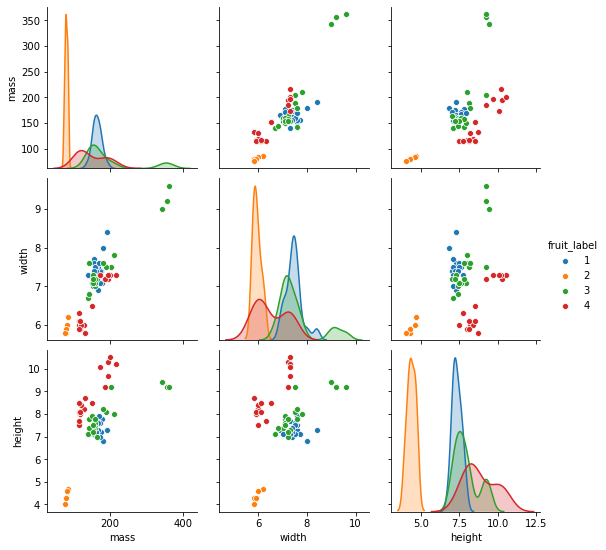

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(fruit2,diag_kind="kde", hue='fruit_label')
plt.show()

In [11]:
fruit.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
dtype: object

In [54]:
fruit.describe()

,fruit_label,mass,width,height
count,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220
std,1.208048,55.018832,0.816938,1.361017
min,1.000000,76.000000,5.800000,4.000000
25%,1.000000,140.000000,6.600000,7.200000
50%,3.000000,158.000000,7.200000,7.600000
75%,4.000000,177.000000,7.500000,8.200000
max,4.000000,362.000000,9.600000,10.500000


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(fruit2[['mass','width','height']])
fruit_scaled = scaler.transform(fruit2[['mass','width','height']])


In [56]:
fruitN = pd.DataFrame(fruit_scaled)
fruitN.head()
fruitN.columns = ['mass','width','height']

fruitN.head()

,mass,width,height
0,0.405594,0.684211,0.507692
1,0.363636,0.578947,0.430769
2,0.349650,0.421053,0.492308
3,0.034965,0.105263,0.107692
4,0.027972,0.052632,0.092308


In [57]:
X=fruitN[['mass','width','height']]
y= fruit['fruit_label']

In [53]:
converttypes={'fruit_label': int}
fruitN.astype(converttypes)


KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [17]:
from sklearn import preprocessing
X_scale = preprocessing.scale(X)

In [18]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.25, random_state=42, stratify=y)


In [165]:
from sklearn.neighbors import KNeighborsClassifier
# recherche de la veur optimale de K
k_range = list(range(2, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    k_scores.append(score.round(2))
print(k_scores)

[0.93, 0.8, 0.8, 0.8, 0.8, 0.8, 0.67, 0.73, 0.6, 0.67, 0.53, 0.53, 0.53, 0.53, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = range(1, 30)
param_grid = {
 'p' : (1,2),
 'weights' : ('uniform','distance'),
 'metric' : ('minkowski', 'chebyshev'),
 }
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scale, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'chebyshev'), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [70]:
grid.best_estimator_

KNeighborsClassifier(weights='distance')

In [71]:
grid.best_score_

0.9

In [72]:
grid.best_params_

{'metric': 'minkowski', 'p': 2, 'weights': 'distance'}

In [170]:
prediction = grid.best_estimator_.predict(X_scale)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, prediction))

[[19  0  0  0]
 [ 0  5  0  0]
 [ 0  0 19  0]
 [ 0  0  0 16]]


In [171]:
grid.fit(X_minmax, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': range(1, 30), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [172]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [173]:
prediction = grid.best_estimator_.predict(X_minmax)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, prediction))

[[19  0  0  0]
 [ 0  5  0  0]
 [ 0  0 19  0]
 [ 0  0  0 16]]


In [174]:
grid.best_score_

0.9

In [74]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as knn

In [76]:
model_1 = dt(random_state=42)
model_2= knn(n_neighbors = 2)
model_3 = svm.SVC()

for model in(model_1, model_2, model_3) : 
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))
 

DecisionTreeClassifier 0.8
KNeighborsClassifier 0.9333333333333333
SVC 0.7333333333333333


In [60]:
from sklearn.ensemble import VotingClassifier

In [61]:
model_4 = VotingClassifier([('DTree', model_1),
                             ('svc', model_3),
                             ('KNN', model_2)],
                           voting = 'soft')
model_4.fit(X_train, y_train)
print(model_4.__class__.__name__, model.score(X_test, y_test))

VotingClassifier 0.7333333333333333


In [35]:
from sklearn.ensemble import BaggingClassifier as bg, RandomForestClassifier as rf

In [62]:
model_5 = bg(random_state=42,base_estimator= knn(), n_estimators=100)
model_5.fit(X_train, y_train)
model_5.score(X_test, y_test)

0.8

In [63]:
model_6 = rf(n_estimators=100)
model_6.fit(X_train, y_train)
model_6.score(X_test, y_test)

0.8666666666666667

In [64]:
from sklearn.ensemble import AdaBoostClassifier as Ada, GradientBoostingClassifier as GB

In [65]:
model_7 = Ada(n_estimators = 100)
model_7.fit(X_train, y_train)
model_7.score(X_test, y_test)

0.6666666666666666

In [66]:
model_8 = GB(n_estimators = 100)
model_8.fit(X_train, y_train)
model_8.score(X_test, y_test)

0.8666666666666667

In [67]:
from sklearn.ensemble import StackingClassifier as ST

In [68]:
model_9 = ST([('DTree', model_1),
              ('svm', model_3),
              ('KNN', model_2)],
            final_estimator = knn())
model_9.fit(X_train, y_train)
model_9.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.8666666666666667